In [2]:
!pip install tensorflowjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 38.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 64.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 64.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 72.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 66.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 62.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 50.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 31.1 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
     

In [3]:
import numpy as np
import cv2 as cv
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from keras.models import Sequential
from keras.layers import Conv2D,Dropout,Flatten,Dense,MaxPool2D
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import warnings
import tensorflowjs as tfjs

warnings.filterwarnings('ignore')

In [4]:
from google.colab import drive

In [7]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
!unzip /content/drive/MyDrive/QistinaCapstone/Eye/Anemia-Classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: new /non-anemia/Non-Anemic-036 (4).png  
  inflating: __MACOSX/new /non-anemia/._Non-Anemic-036 (4).png  
  inflating: new /non-anemia/non-anemia2892.jpg  
  inflating: __MACOSX/new /non-anemia/._non-anemia2892.jpg  
  inflating: new /non-anemia/Non-Anemic-057 (2).png  
  inflating: __MACOSX/new /non-anemia/._Non-Anemic-057 (2).png  
  inflating: new /non-anemia/non-anemia2662.jpg  
  inflating: __MACOSX/new /non-anemia/._non-anemia2662.jpg  
  inflating: new /non-anemia/non-anemia4213.jpg  
  inflating: __MACOSX/new /non-anemia/._non-anemia4213.jpg  
  inflating: new /non-anemia/Non-Anemic-191 (6).png  
  inflating: __MACOSX/new /non-anemia/._Non-Anemic-191 (6).png  
  inflating: new /non-anemia/Non-Anemic-047 (2).png  
  inflating: __MACOSX/new /non-anemia/._Non-Anemic-047 (2).png  
  inflating: new /non-anemia/non-anemia2676.jpg  
  inflating: __MACOSX/new /non-anemia/._non-anemia2676.jpg  
  inflating: new /non-anemia/

In [9]:
Categories = ["anemia", "non-anemia"]

In [10]:
data_dir = '/content/new '

In [11]:
data = []
for category in Categories:
    path = os.path.join(data_dir, category)
    class_num = Categories.index(category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        img_arr = cv.imread(img_path)
        if img_arr is not None:
            re = cv.resize(img_arr, (64, 64))
            data.append([re, class_num])
        else:
            print(f"Failed to load image: {img_path}")

Failed to load image: /content/new /anemia/.DS_Store
Failed to load image: /content/new /non-anemia/.DS_Store


In [12]:
np.random.shuffle(data)

In [13]:
x_data = []
y_data = []
for features,labels in data:
  x_data.append(features)
  y_data.append(labels)

In [14]:
x_data = np.array(x_data)
y_data = np.array(y_data)

In [15]:
print (f"shape of x data {x_data.shape}")
print (f"shape of y data {y_data.shape}")

shape of x data (8524, 64, 64, 3)
shape of y data (8524,)


In [28]:
y_data

array([1, 0, 0, ..., 1, 0, 1])

In [16]:
x_data = x_data/255.0

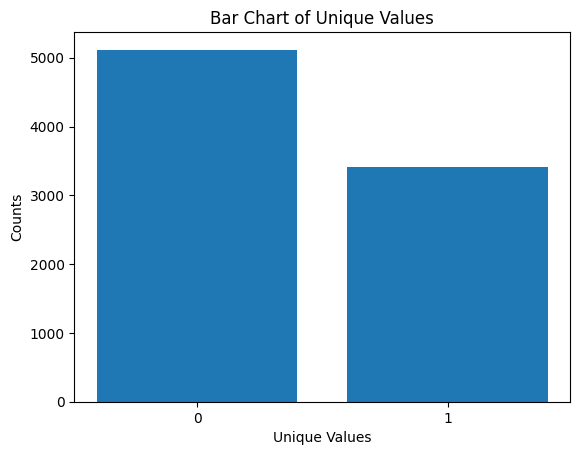

In [31]:
unique_values, value_counts = np.unique(y_data, return_counts=True)

# Create the bar chart
plt.bar(unique_values, value_counts)

# Add labels and title
plt.xlabel('Unique Values')
plt.ylabel('Counts')
plt.title('Bar Chart of Unique Values')
plt.xticks(unique_values)

# Show the plot
plt.show()

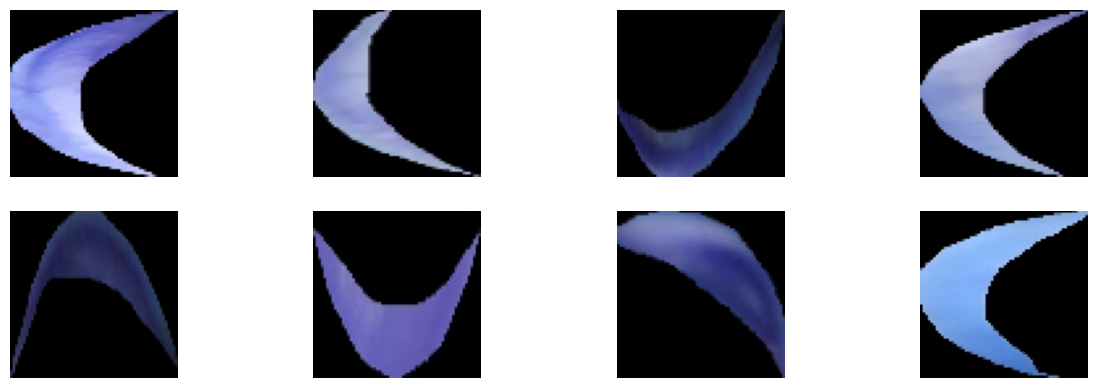

In [32]:
plt.figure(figsize = (15,10))
for i in range (8) :
  plt.subplot(4,4,i+1)
  plt.imshow(x_data[i],cmap='gray')
  plt.axis("off")

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.2,random_state=22)

In [20]:
print(f"shape of x train {x_train.shape}")
print(f"shape of y train {y_train.shape}")
print(f"shape of x test {x_test.shape}")
print(f"shape of y test {y_test.shape}")

shape of x train (6819, 64, 64, 3)
shape of y train (6819,)
shape of x test (1705, 64, 64, 3)
shape of y test (1705,)


In [34]:
y_train

array([0, 1, 0, ..., 1, 0, 0])

In [35]:
y_test

array([1, 0, 1, ..., 0, 0, 0])

In [36]:
model = Sequential()
model.add(Conv2D(100, (3,3), input_shape = (64,64,3), activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(150, (3,3), activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(100, activation = 'relu'))
model.add(Dense(2, activation = 'sigmoid'))

In [37]:
model.compile (optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(x_train,y_train, validation_data = (x_test, y_test), batch_size = 20, epochs = 10)

Epoch 1/10
341/341 ━━━━━━━━━━━━━━━━━━━━ 157s 456ms/step - accuracy: 0.6142 - loss: 0.6805 - val_accuracy: 0.6944 - val_loss: 0.5970
Epoch 2/10
341/341 ━━━━━━━━━━━━━━━━━━━━ 199s 448ms/step - accuracy: 0.7204 - loss: 0.5481 - val_accuracy: 0.7971 - val_loss: 0.4345
Epoch 3/10
341/341 ━━━━━━━━━━━━━━━━━━━━ 151s 443ms/step - accuracy: 0.8665 - loss: 0.3186 - val_accuracy: 0.9109 - val_loss: 0.2175
Epoch 4/10
341/341 ━━━━━━━━━━━━━━━━━━━━ 149s 437ms/step - accuracy: 0.9597 - loss: 0.1115 - val_accuracy: 0.9625 - val_loss: 0.1443
Epoch 5/10
341/341 ━━━━━━━━━━━━━━━━━━━━ 207s 449ms/step - accuracy: 0.9874 - loss: 0.0421 - val_accuracy: 0.9783 - val_loss: 0.1111
Epoch 6/10
341/341 ━━━━━━━━━━━━━━━━━━━━ 197s 436ms/step - accuracy: 0.9958 - loss: 0.0140 - val_accuracy: 0.9830 - val_loss: 0.0974
Epoch 7/10
341/341 ━━━━━━━━━━━━━━━━━━━━ 202s 437ms/step - accuracy: 0.9988 - loss: 0.0072 - val_accuracy: 0.9836 - val_loss: 0.1121
Epoch 8/10
341/341 ━━━━━━━━━━━━━━━━━━━━ 152s 447ms/step - accuracy: 0.9969 -

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 62, 62, 100)         │           2,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 31, 31, 100)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 29, 29, 150)         │         135,150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 150)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 29400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │       2,940,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             202 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,234,758 (35.23 MB)

 Trainable params: 3,078,252 (11.74 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,156,506 (23.49 MB)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
print ("the accuracy score for the model is ", accuracy_score(y_test, y_pred.argmax(axis=1)))

In [ ]:
y_pred

In [ ]:
y_test

In [ ]:
print (classification_report(y_test, y_pred.argmax(axis=1)))

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test,y_pred.argmax(axis=1)),annot=True,fmt='g')
plt.title("confusion matrix for CNN Model")
plt.show()

In [ ]:
predictions = model.predict(x_test[0].reshape(1,64,64,3))

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(x_test[0])
plt.title(f"the original class {y_test[0]}")
plt.subplot(1,2,2)
plt.imshow(x_test[0])
plt.title(f"predicted class {predictions.argmax(axis=1)}")
plt.show()

In [ ]:
model.save_weights('my_model.weights.h5')

In [ ]:
model.save('my_model.h5')

In [ ]:
from google.colab import files
files.download('my_model.h5')